### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('../data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
# describe the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# Shape of the data
data.shape

(12684, 26)

In [7]:
# So original data has 26 columns and 12684 rows

# Lets check for missing values
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
# lets get the list of numerical and categorical columns
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[object]).columns
(numerical_features, len(numerical_features), categorical_features, len(categorical_features))

(Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
        'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
       dtype='object'),
 8,
 Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
        'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
        'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
        'Restaurant20To50'],
       dtype='object'),
 18)

In [9]:
# Lets print the unique values in each categorical column
for col in categorical_features:
    print(f'{col}: {data[col].unique()}')

destination: ['No Urgent Place' 'Home' 'Work']
passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather: ['Sunny' 'Rainy' 'Snowy']
time: ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration: ['1d' '2h']
gender: ['Female' 'Male']
age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Suppor

In [10]:
# Lets print the unique values in each numerical column
for col in numerical_features:
    print(f'{col}: {data[col].unique()}')

temperature: [55 80 30]
has_children: [1 0]
toCoupon_GEQ5min: [1]
toCoupon_GEQ15min: [0 1]
toCoupon_GEQ25min: [0 1]
direction_same: [0 1]
direction_opp: [1 0]
Y: [1 0]


In [11]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
# from the above analysis we can see that the car column is almost useless as it has very few values, so we can either drop it or replace it with some other value
# Also I am not going to use the columns 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'
# so lets drop these columns
data.drop(columns=['car', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], inplace=True)

# For Rest of the data we can drop the rows with nan values
# Bar                       107
# CoffeeHouse               217
# CarryAway                 151
# RestaurantLessThan20      130
# Restaurant20To50          189
data.dropna(inplace=True)
data.rename(columns={'Y':'Accepted'}, inplace=True)

# lets get the list of numerical and categorical columns
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[object]).columns

print(data.shape)
data.isnull().sum()

(12079, 22)


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
direction_same          0
direction_opp           0
Accepted                0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [13]:
# since the 'Accepted' column has values 0 and 1, we can use the mean to get the percentage of 1s
percent_accepted_coupon = data['Accepted'].mean()
print(f'Proportion of accepted coupons: {percent_accepted_coupon: .2f}')

Proportion of accepted coupons:  0.57


5. Use a bar plot to visualize the `coupon` column.

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/2892680704.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='coupon', data=data, palette='bright')


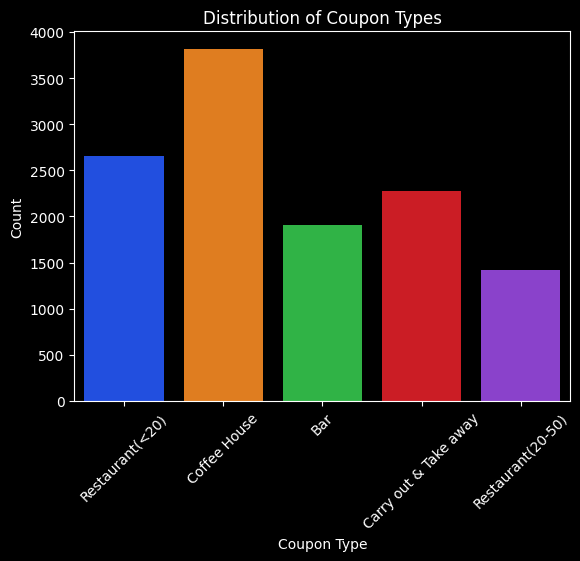

In [14]:
sns.countplot(x='coupon', data=data, palette='bright')
plt.xticks(rotation=45)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()



6. Use a histogram to visualize the temperature column.

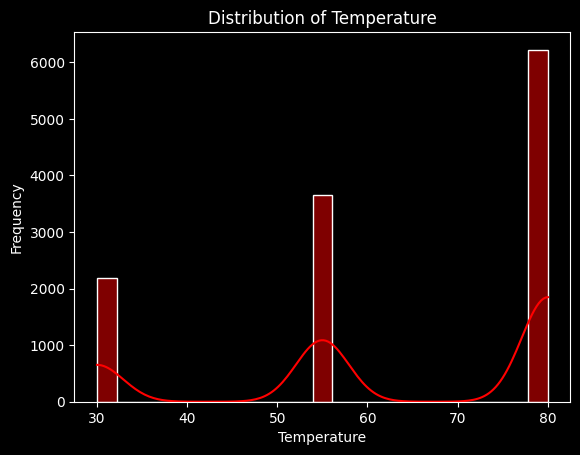

In [15]:
sns.histplot(data=data, x='temperature', kde=True, color='red')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## Visualizing other columns (except coupons and Temperature)
Coupons and Temperature columns have already been visualized above. Let's try to visualize rest of the columns

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


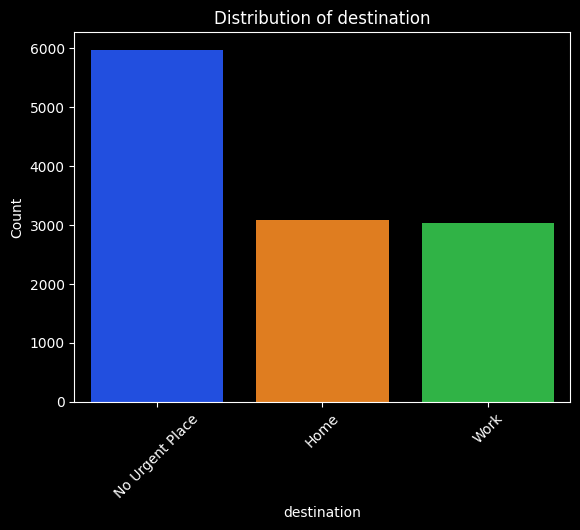

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


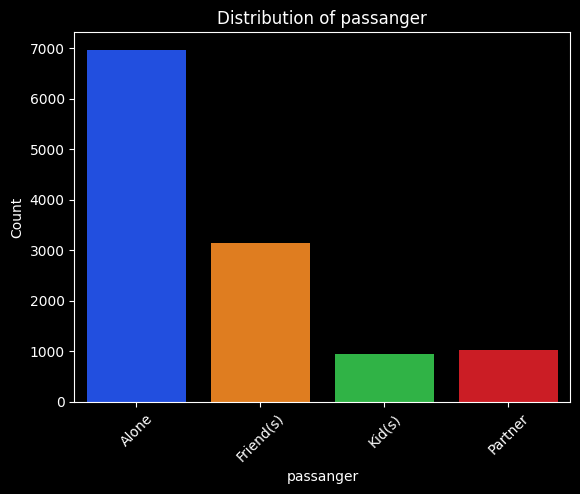

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


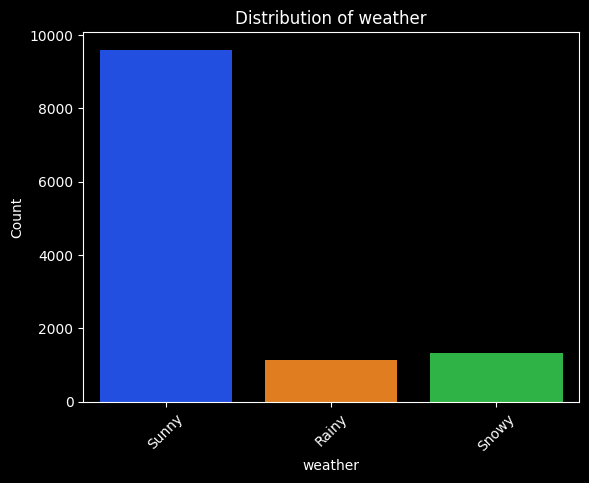

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


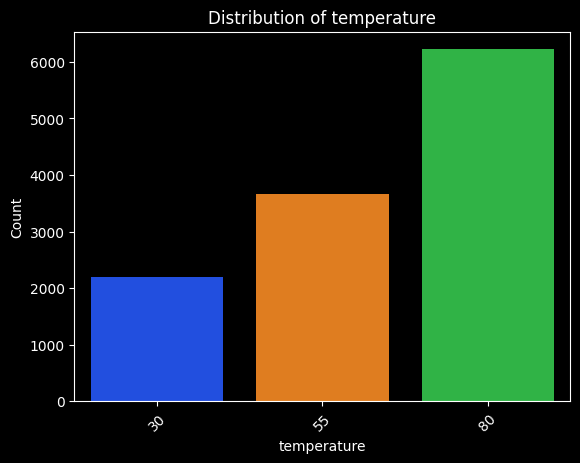

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


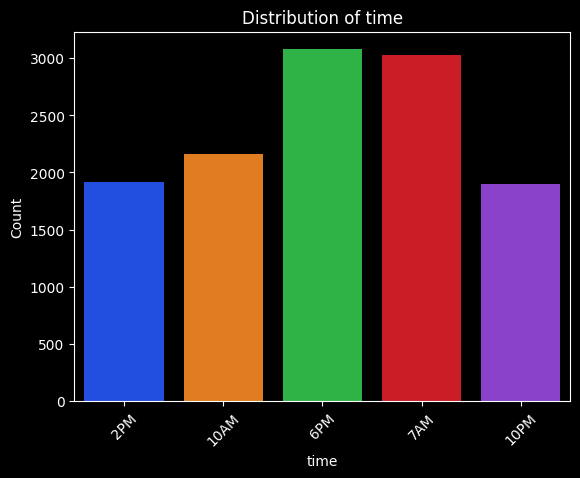

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


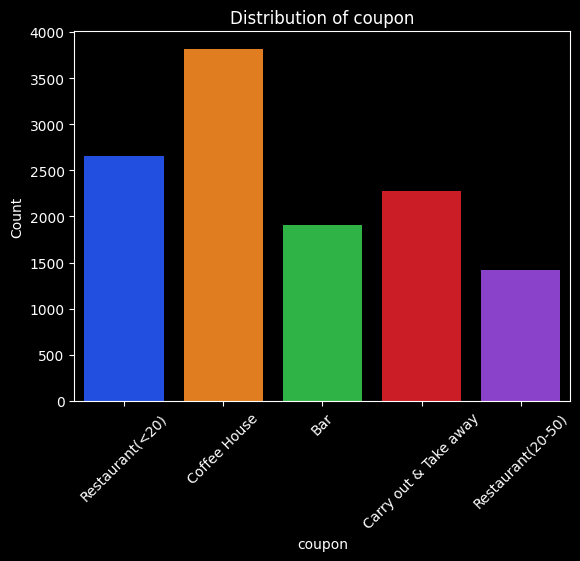

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


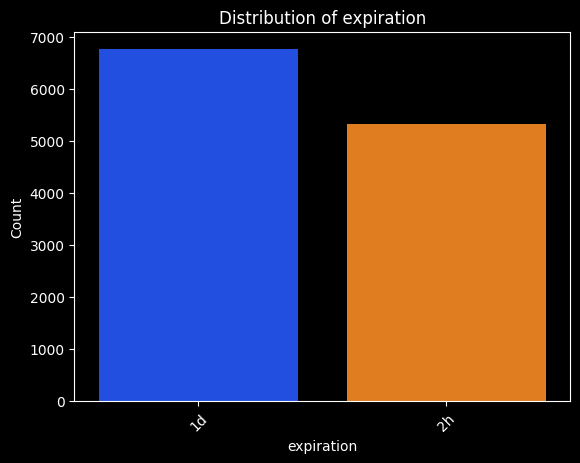

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


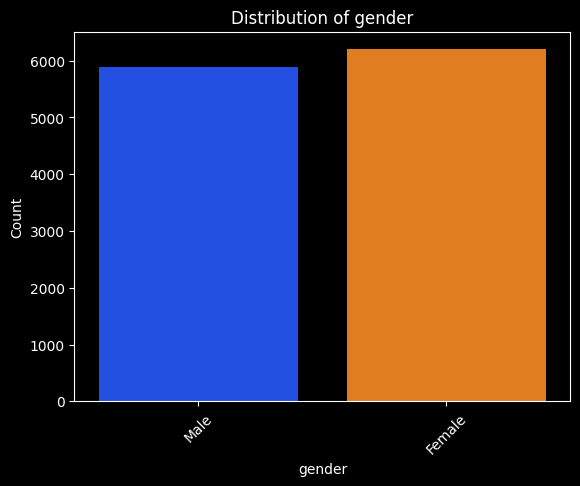

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


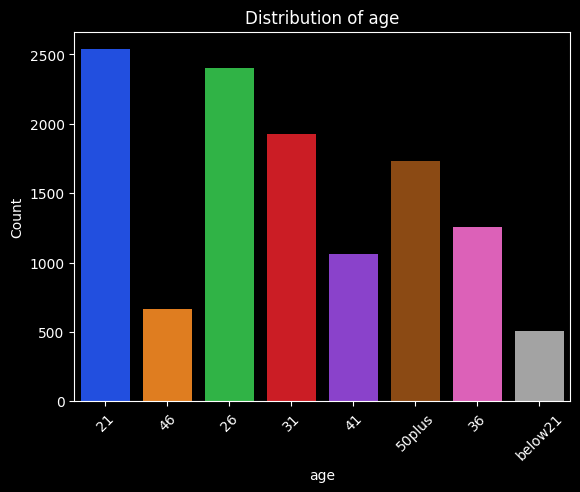

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


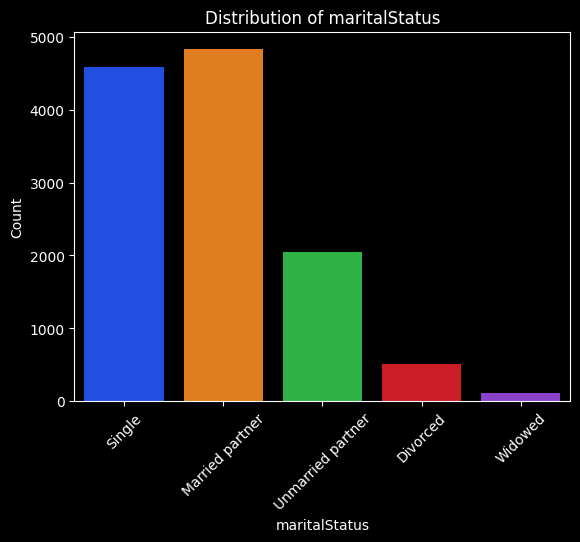

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


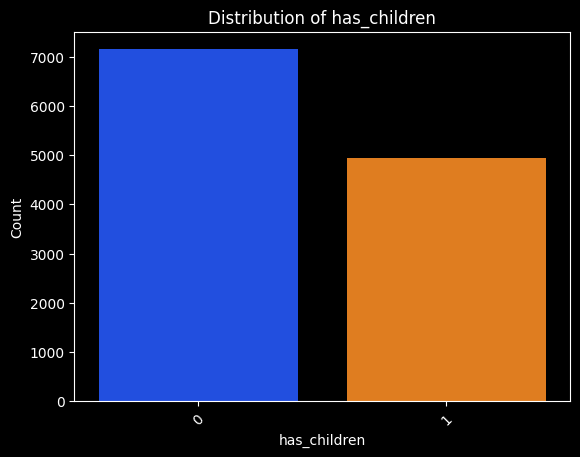

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


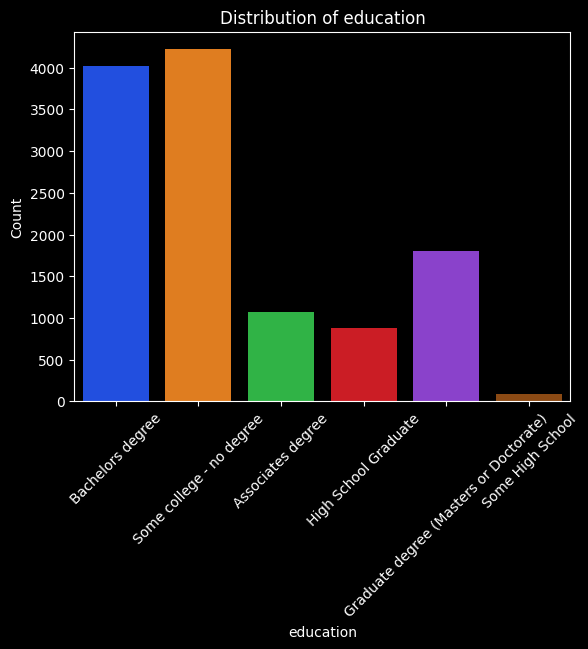

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


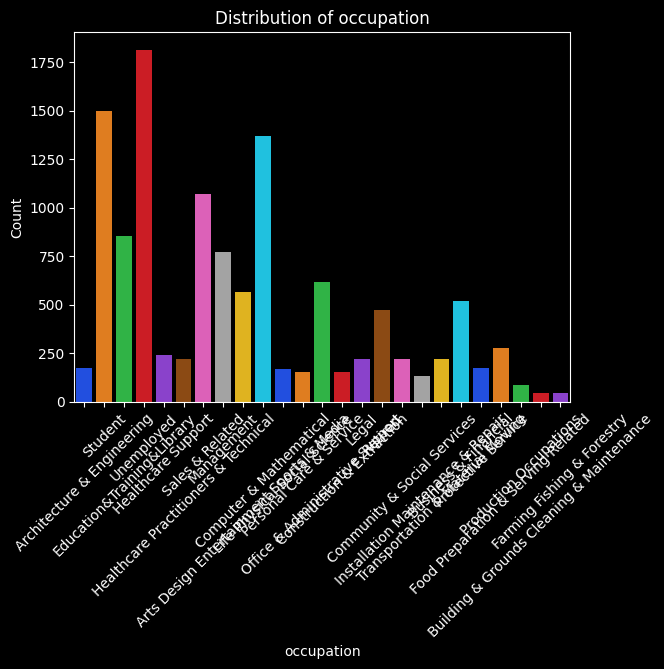

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


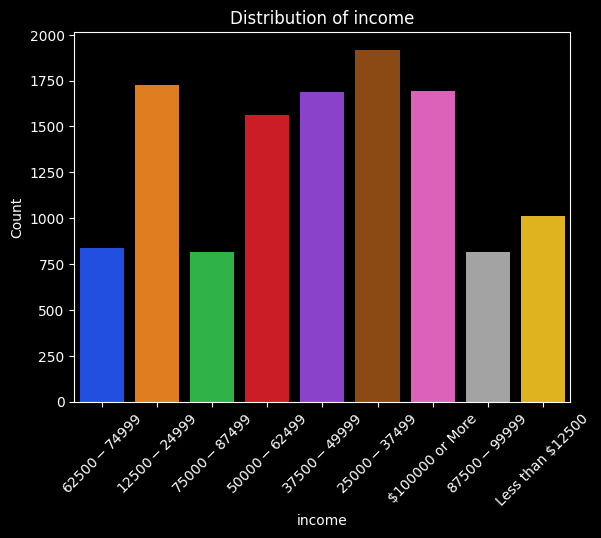

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


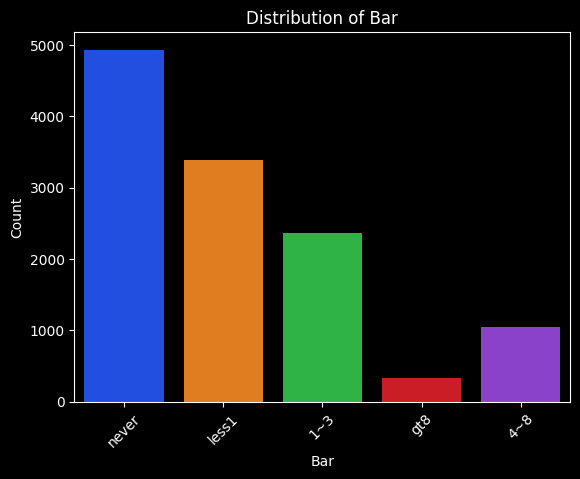

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


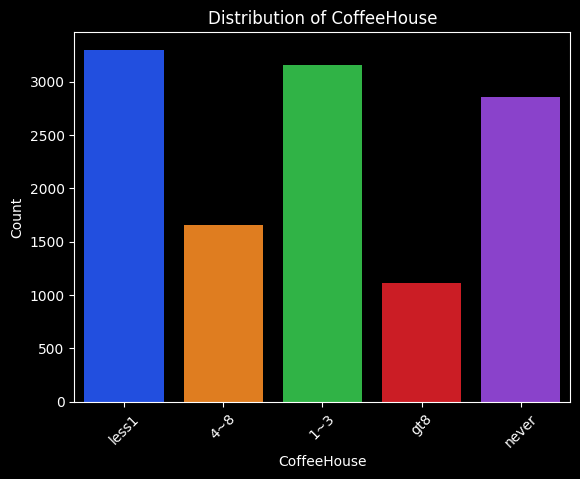

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


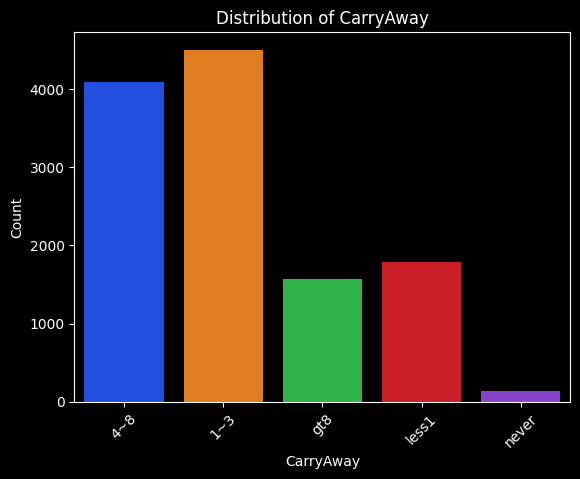

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


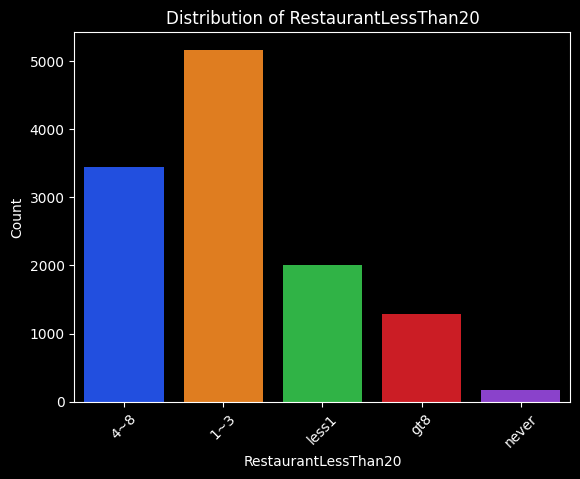

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


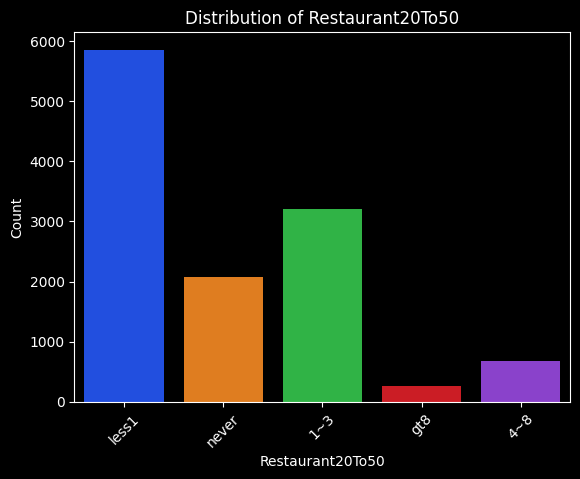

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


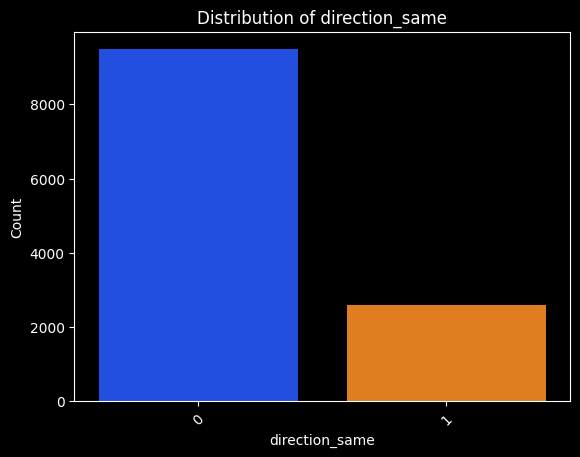

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


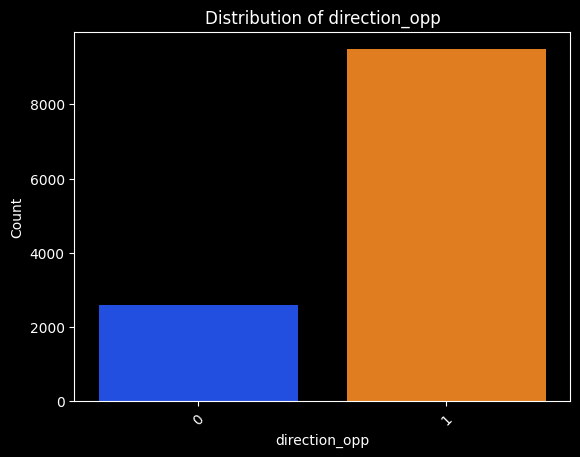

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_4143/1070170201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='bright')


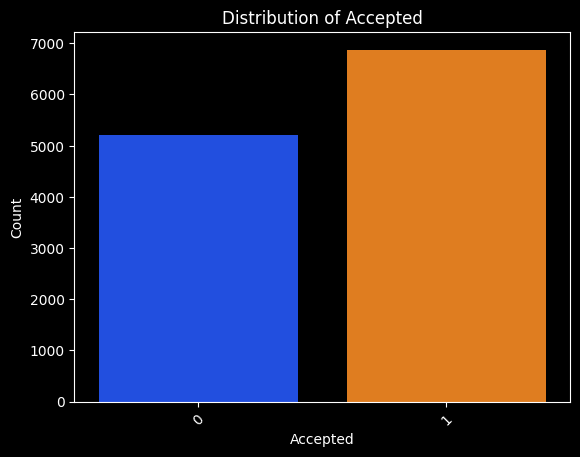

In [16]:
for col in data.columns:
    sns.countplot(x=col, data=data, palette='bright')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Observations from the distribution of various columns
From the above plots it can be observed that for few columns the data is not equally distributed and those fields are:
1. Direction of Travel is skewed towards driving in opposite direction
2. For Coupons frequency of visits in some cases are skewed for a particular group
3. With respect to Marital status widowed are not aptly represented.
4. Occupation categories are not equally represented.
5. With respect to weather, most entries corresponds to sunny weather.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
bar_data = data.query('coupon == "Bar"').copy()
bar_data.shape

(1913, 22)

2. What proportion of bar coupons were accepted?


In [18]:
bar_coupon_accepted = bar_data['Accepted'].mean()
print(f'Proportion of Bar Coupons Accepted: {bar_coupon_accepted * 100: .2f}%')

Proportion of Bar Coupons Accepted:  41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
# add a new column to the bar_data to indicate if the person is visiting the bar 3 or fewer time a month or more
bar_data['visit_3_or_less'] = bar_data['Bar'].apply(lambda value: value in ['never', 'less1', '1~3'])
bar_coupon_accepted_by_visits = bar_data.groupby('visit_3_or_less')['Accepted'].mean()
bar_coupon_accepted_by_visits
print(f'Acceptance rate for people who visit the bar 3 or fewer times a month: {bar_coupon_accepted_by_visits[True] * 100:.2f}%', )
print(f'Acceptance rate for people who visit the bar more than 3 times a month: {bar_coupon_accepted_by_visits[False] * 100: .2f}%',)

import plotly.express as px
fig = px.histogram(data_frame=bar_data, x='visit_3_or_less', color='Accepted')
fig.update_layout(width=800, height=600)  # Set the desired width and height in 
fig.show()


Acceptance rate for people who visit the bar 3 or fewer times a month: 37.27%
Acceptance rate for people who visit the bar more than 3 times a month:  76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [20]:
# add a new column match_criteria to the bar_data
condition = '(Bar != "never") & (Bar != "less1") & (age != "21") & (age != "below21")'
bar_data['match_criteria'] = bar_data.eval(condition)
bar_coupon_accepted_by_match_criteria = bar_data.groupby('match_criteria')['Accepted'].mean()
print(f'Acceptance rate for people who go to a bar more than once a month and are over the age of 25: {bar_coupon_accepted_by_match_criteria[True] * 100:.2f}%', )
print(f'Acceptance rate for people who do not match the above criteria: {bar_coupon_accepted_by_match_criteria[False] * 100: .2f}%',)

fig = px.histogram(data_frame=bar_data, x='match_criteria', color='Accepted')
fig.update_layout(width=800, height=600)  # Set the desired width and height in 
fig.show()

px.histogram(data_frame=bar_data, x='Bar', color='Accepted', facet_row='match_criteria')

Acceptance rate for people who go to a bar more than once a month and are over the age of 25: 68.98%
Acceptance rate for people who do not match the above criteria:  33.77%


In [21]:
px.histogram(data_frame=bar_data, x='age', color='Accepted', facet_col='match_criteria', category_orders={'age': ['below21', '21', '26', '31', '36', '41', '46', '50plus']})

In [22]:
px.histogram(data_frame=bar_data.query('(Bar != "never") & (Bar != "less1")'), x='age', color='Accepted', category_orders={'age': ['below21', '21', '26', '31', '36', '41', '46', '50plus']})

In [23]:
px.histogram(data_frame=bar_data.query('not((Bar != "never") & (Bar != "less1"))'), x='age', color='Accepted', category_orders={'age': ['below21', '21', '26', '31', '36', '41', '46', '50plus']})

Yes, there is a difference between these two groups.  
Acceptance rate for people who go to a bar more than once a month and are over the age of 25: 0.69
Acceptance rate for people who do not match the above criteria: 0.34

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [24]:
bar_values_allowed = ['1~3', '4~8', 'gt8']
passanger_values_not_allowed = ['Kid(s)']
occupation_values_not_allowed = ['Farming Fishing & Forestry']
bar_data['match_criteria'] = bar_data.eval('Bar in @bar_values_allowed and passanger not in @passanger_values_not_allowed and occupation not in @occupation_values_not_allowed')
bar_coupon_accepted_by_match_criteria = bar_data.groupby('match_criteria')['Accepted'].mean()
print(f'Acceptance rate for people who go to bars more than once a month and \n\thad passengers that were not a kid and had \n\toccupations other than farming, fishing, or forestry\n: {bar_coupon_accepted_by_match_criteria[True] * 100:.2f}%')
print(f'Acceptance rate for people who do not match the above criteria: {bar_coupon_accepted_by_match_criteria[False] * 100:.2f}%')

fig = px.histogram(data_frame=bar_data, x='match_criteria', color='Accepted')
fig.update_layout(width=800, height=600)  # Set the desired width and height in 
fig.show()


Acceptance rate for people who go to bars more than once a month and 
	had passengers that were not a kid and had 
	occupations other than farming, fishing, or forestry
: 70.94%
Acceptance rate for people who do not match the above criteria: 29.79%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to budget_friendly restaurants more than 4 times a month and income is less than 50K. 



In [25]:
(bar_data.Bar.unique(), bar_data.passanger.unique(), bar_data.age.unique(), bar_data.income.unique(), bar_data.RestaurantLessThan20.unique(), bar_data.maritalStatus.unique())
condition1 = '(Bar not in ["never", "less1"]) & (passanger != "Kid(s)") & (maritalStatus != "Widowed")'
condition2 = '(Bar not in ["never", "less1"]) & (age in ["below21", "21", "26"])'
condition3 = '(RestaurantLessThan20 in ["4~8", "gt8"]) & (income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"])'
bar_data['match_criteria'] = bar_data.eval(f'({condition1}) or ({condition2}) or ({condition3})')
bar_coupon_accepted_by_match_criteria = bar_data.groupby('match_criteria')['Accepted'].mean()
print(f'Acceptance rate for people who \n\t(go to bars more than once a month, had passengers that were not a kid, and were not widowed) OR \n\t(go to bars more than once a month and are under the age of 30) OR \n\t(go to budget_friendly restaurants more than 4 times a month and income is less than 50K.)\n:{bar_coupon_accepted_by_match_criteria[True] * 100:.2f}%')   
print(f'Acceptance rate for people who do not match the above criteria: {bar_coupon_accepted_by_match_criteria[False] * 100:.2f}%')

fig = px.histogram(data_frame=bar_data, x='match_criteria', color='Accepted')
fig.update_layout(width=800, height=600)  # Set the desired width and height in 
fig.show()


Acceptance rate for people who 
	(go to bars more than once a month, had passengers that were not a kid, and were not widowed) OR 
	(go to bars more than once a month and are under the age of 30) OR 
	(go to budget_friendly restaurants more than 4 times a month and income is less than 50K.)
:58.71%
Acceptance rate for people who do not match the above criteria: 29.99%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Insights from the Observations:

### 1. Frequency of Visits vs. Bar Coupon Acceptance
Drivers who visit bars three or more times a month show a strong positive correlation with accepting bar coupons. Without any other factors, bar coupons have a 41% acceptance rate, which jumps to 76% for drivers visiting bars more than three times a month. Therefore, **targeting frequent bar visitors is an effective strategy for bar-related coupons**.

### 2. Effect of Age on Coupon Acceptance for Casual or Frequent Bar Visitors
Drivers over the age of 25 who visit bars casually (1 to 3 times) or frequently (4 or more times) also show a positive correlation with accepting bar coupons, with a 69% acceptance rate. Interestingly, there are drivers under 25 who accept bar coupons even though they are not legally allowed to drink at bars.

### 3. Effect of Kids and Urban Area Residents
Casual or frequent bar-visiting drivers traveling without kids and working in non-rural settings demonstrate a strong correlation with accepting bar coupons, with a 71% acceptance rate.

### 4. Social and Economic Factors on Acceptance Rate
Casual or frequent bar-visiting drivers who are in a relationship or are young and belong to a lower-income group also show a positive correlation with accepting bar coupons, with an acceptance rate of 59% compared to the other group’s 30%.

## Commonalities from the Observations:
1. Drivers who visit bars more than once show a positive inclination toward accepting bar coupons.
2. Being socially active and without responsibilities of kids also contributes positively to the acceptance rate.
3. Being young with limited disposable income slightly reduces the acceptance rate, but they still represent a good target market.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [26]:
budget_friendly_restaurants = data.query('coupon == "Restaurant(<20)"').copy()

In [27]:
print(f'Acceptance rate for Budget Friendly Restaurants: {budget_friendly_restaurants.Accepted.mean() * 100 :.2f}%')

Acceptance rate for Budget Friendly Restaurants: 70.90%


Lets analyze the cheap restaurants data with respect to other features

In [28]:
for col in categorical_features.drop('coupon'):
    fig = px.histogram(data_frame=budget_friendly_restaurants, x=col, color='Accepted', title=f'Budget Friendly Restaurants Coupons Accepted Rate by {col}').update_layout(width=800, height=600)
    fig.write_image(f'../images/BudgetFriendly{col}Dist.png')
    fig.show()


In [31]:
budget_friendly_restaurants.time.unique()

px.histogram(data_frame=budget_friendly_restaurants, x='Accepted', color='time', title='Budget Friendly Restaurants Coupons Accepted Rate by Time')

In [33]:
lunch_dinner_condition = '(time == "2PM") | (time == "6PM")'
budget_friendly_restaurants['lunch_dinner'] = budget_friendly_restaurants.eval(lunch_dinner_condition)
print(budget_friendly_restaurants.groupby('lunch_dinner')['Accepted'].mean())
fig = px.histogram(data_frame=budget_friendly_restaurants, x='lunch_dinner', color='Accepted', title='Budget Friendly Restaurants Coupons Accepted Rate by Lunch/Dinner').update_layout(width=800, height=600)
fig.write_image('../images/BudgetFriendlyLunchDinnerDist.png')
fig.show()


lunch_dinner
False    0.589202
True     0.820364
Name: Accepted, dtype: float64


In [40]:
print(budget_friendly_restaurants.destination.unique())
px.histogram(budget_friendly_restaurants.query('lunch_dinner == True'), x = 'Accepted', color = 'destination', title = 'Budget Friendly Restaurants Acceptance Rate - Lunch/Dinner hours vs Destination').update_layout(width=800, height = 600).show()
px.histogram(budget_friendly_restaurants.query('lunch_dinner == False'), x = 'Accepted', color = 'destination', title = 'Budget Friendly Restaurants Acceptance Rate - Non Lunch/Dinner hours vs Destination').update_layout(width=800, height = 600).show()

['No Urgent Place' 'Work' 'Home']


In [36]:
print(budget_friendly_restaurants.query('lunch_dinner == True').groupby('destination')['Accepted'].mean())
print(budget_friendly_restaurants.query('lunch_dinner == False').groupby('destination')['Accepted'].mean())
print(budget_friendly_restaurants.groupby('destination')['Accepted'].mean())


destination
Home               0.759825
No Urgent Place    0.832461
Name: Accepted, dtype: float64
destination
Home               0.370968
No Urgent Place    0.703320
Work               0.587591
Name: Accepted, dtype: float64
destination
Home               0.557652
No Urgent Place    0.794226
Work               0.587591
Name: Accepted, dtype: float64


# How about when we are traveling in the same direction

In [41]:
budget_friendly_restaurants.direction_same.unique()

array([0, 1])

In [43]:
print(budget_friendly_restaurants.groupby('direction_same')['Accepted'].mean())
px.histogram(data_frame=budget_friendly_restaurants, x='direction_same', color='Accepted', title='Budget Friendly Restaurants Coupons Accepted Rate by Travel in Same Direction').update_layout(width=800, height=600).show()


direction_same
0    0.725472
1    0.634855
Name: Accepted, dtype: float64


In [44]:
print(budget_friendly_restaurants.query('direction_same==1').groupby('expiration')['Accepted'].mean())
px.histogram(data_frame=budget_friendly_restaurants.query('direction_same==1'), x='expiration', color='Accepted', title='Budget Friendly Restaurants Coupons Accepted Rate by Travel in Same Direction and Expiration').update_layout(width=800, height=600).show()

expiration
1d    0.805263
2h    0.523973
Name: Accepted, dtype: float64


# How about when we are traveling in the opposite direction

In [45]:
print(budget_friendly_restaurants.groupby('direction_opp')['Accepted'].mean())
px.histogram(data_frame=budget_friendly_restaurants, x='direction_opp', color='Accepted', title='Budget Friendly Restaurants Coupons Accepted Rate by Travel in Opposite Direction').show()

direction_opp
0    0.634855
1    0.725472
Name: Accepted, dtype: float64


In [46]:
print(budget_friendly_restaurants.query('direction_opp==1').groupby('expiration')['Accepted'].mean())
px.histogram(data_frame=budget_friendly_restaurants.query('direction_opp==1'), x='expiration', color='Accepted', title='Budget Friendly Restaurants Coupons Accepted Rate by Travel in Opposite Direction and Expiration').show()

expiration
1d    0.841198
2h    0.606174
Name: Accepted, dtype: float64


In [47]:
# What about kids?
px.histogram(data_frame=budget_friendly_restaurants, x='passanger', color='Accepted', title='Budget Friendly Restaurants Coupons Accepted Rate by Passanger').show()

In [48]:
in_group = '(passanger != "Alone")'
budget_friendly_restaurants['in_group'] = budget_friendly_restaurants.eval(in_group)
print(budget_friendly_restaurants.groupby('in_group')['Accepted'].mean())
px.histogram(data_frame=budget_friendly_restaurants, x='in_group', color='Accepted', title='Budget Friendly Restaurants Coupons Accepted Rate by Traveling in Group or Alone').show()


in_group
False    0.640876
True     0.781761
Name: Accepted, dtype: float64


In [49]:
px.histogram(data_frame=budget_friendly_restaurants.query('in_group==1'), x='Accepted', color='age', title='Budget Friendly Restaurants Coupons Accepted Rate by Passenger in Group').show()

In [51]:
young_people = ['below21', '21', '26']
print(budget_friendly_restaurants.query('in_group==1 and age in @young_people')['Accepted'].mean())
print(budget_friendly_restaurants.query('not(in_group==1 and age in @young_people)')['Accepted'].mean())
print(budget_friendly_restaurants.query('age in @young_people')['Accepted'].mean())
print(budget_friendly_restaurants.query('not(age in @young_people)')['Accepted'].mean())
px.histogram(data_frame=budget_friendly_restaurants.query('in_group==1 and age in @young_people'), x='Accepted', color='age', title='Budget Friendly Restaurants Coupons Accepted Rate by Passenger in Group').show()

0.8324324324324325
0.6763584366062917
0.7396798652064027
0.6841746248294679


## Conclusions
1. During Lunch/Dinner hours the acceptance rate is very high.
2. People at work are not interested in going to budget friendly restaurants for lunch/dinner. Dinner can be because no one is in office by that time and for lunch people might be more inclined towards take outs.
3. People neither at home or work are very receptacle to coupons irrespective of time.
4. People at work shows very less interest for budget-friendly restaurants even during non lunch/dinner hours.



## Next Steps
I would like to explore more relationships on coffee house coupons with other features and conclude some interesting insights.